In [6]:
# Add Matplotlib inline
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Loading files
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [8]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [9]:
# Read the ride data file and store it in a Pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [10]:
# Inspecting city_data_df
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [12]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [13]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [16]:
# Get the number of data points from the Urban cities.
city_data_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [19]:
# Inspecting ride_data_df
# Get the columns and the rows that are not null.
ride_data_df.count()

# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [20]:
# Merging dataframes
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [26]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [27]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [28]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [32]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [36]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [39]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [49]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [50]:
# Get average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [51]:
# Get average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [52]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [54]:
# Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [55]:
# Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [ ]:
# Create the scatter plots

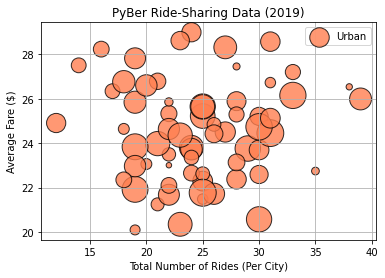

In [64]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

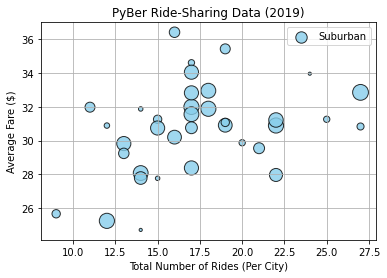

In [66]:
# Build the scatter plots for sububan cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

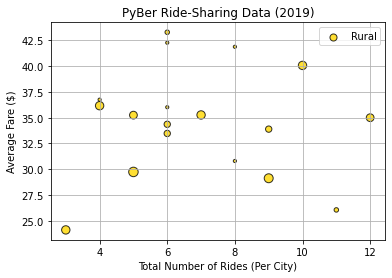

In [67]:
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

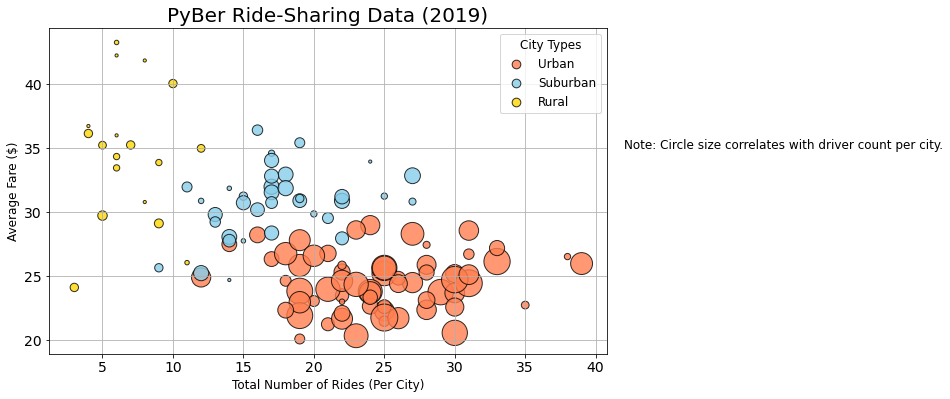

In [237]:
# Build the scatter plots for urban cities
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")

# Build the scatter plots for sububan cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")

# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

# Show the plot
plt.show()



In [ ]:
# Module 5.4.1

In [107]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [109]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [111]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [116]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [118]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [119]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [120]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [126]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urbam trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}")

The mean for the ride counts for urbam trips is 24.62.
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [131]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [182]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

suburban_fares = suburban_cities_df["fare"]
suburban_fares

rural_fares = rural_cities_df["fare"]
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [138]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [140]:
pyber_data_df.groupby("type").mean()["fare"]

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [142]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [154]:
# Mean, median and mode for driver count in suburban cities
np.mean(pyber_data_df[pyber_data_df["type"] == "Suburban"]["driver_count"]), np.median(pyber_data_df[pyber_data_df["type"] == "Suburban"]["driver_count"]), sts.mode(pyber_data_df[pyber_data_df["type"] == "Suburban"]["driver_count"])

(13.712, 16.0, ModeResult(mode=array([20], dtype=int64), count=array([79])))

In [ ]:
# Module 5.4.4

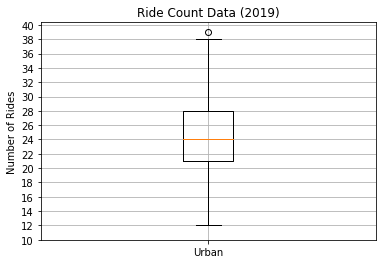

In [159]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels = x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

In [160]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

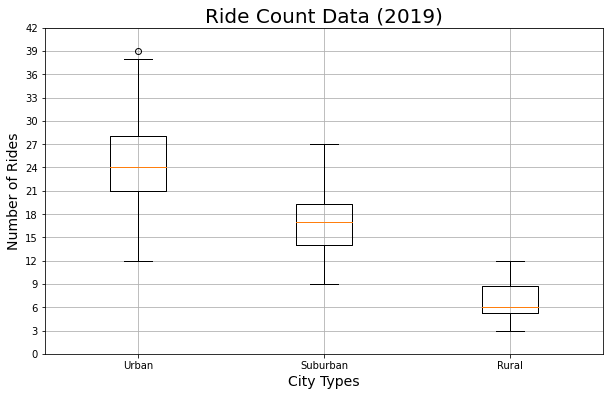

In [190]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [174]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


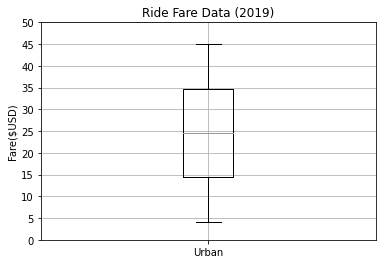

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [178]:
# Create a box-and-whisker plot fot the urban fare data
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Add the title, y-axis and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

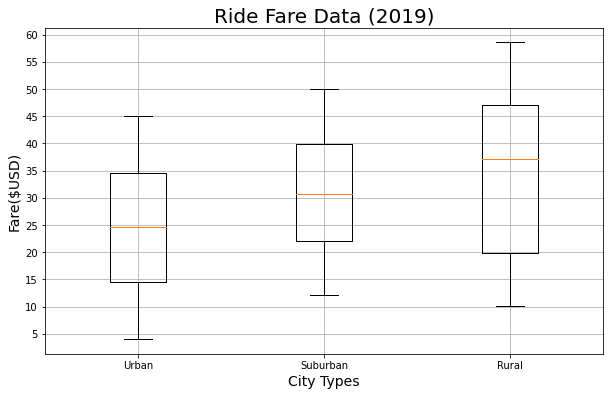

In [206]:
# Create a box-and-whisker plot fot the urban fare data
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))
#ax.boxplot(fare_data, labels = x_labels)

# Add the title, y-axis and grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.boxplot(fare_data, labels = x_labels)
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")
plt.show()

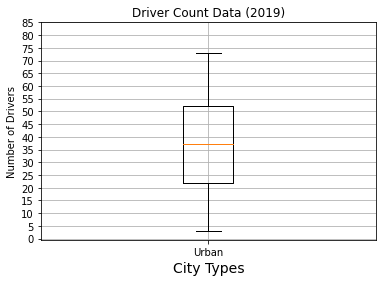

<Figure size 432x288 with 0 Axes>

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [188]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

#Add the title, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

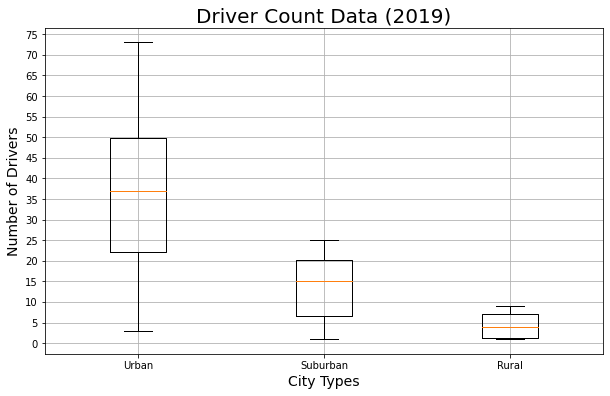

In [205]:
# Create a box-and-whisker plot for the drive count
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

fig, ax = plt.subplots(figsize=(10, 6))
#ax.boxplot(driver_count_data, labels = x_labels)

# Add the title, y-axis and grid
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.boxplot(driver_count_data, labels = x_labels)
ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")
plt.show()

In [212]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [208]:
# Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [215]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [216]:
# Calculate the percentage of fare for each city type
type_percents= 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

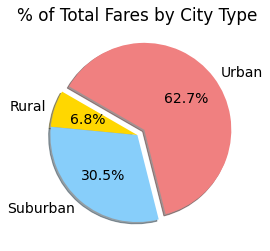

In [236]:
# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default fonr size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")


# Show figure
plt.show()

In [222]:
# Calculate the percentage of rices for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

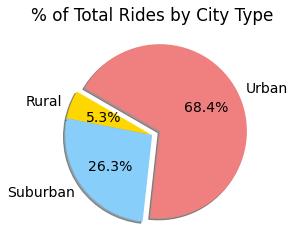

In [234]:
# Build the percentage of rides by city type pie chart
plt.pie(ride_percents, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")


# Show figure
plt.show()

In [ ]:
# Module 5.7.1

In [232]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

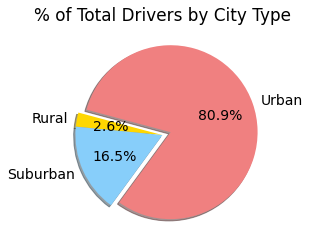

In [235]:
# Build the percentage of rides by city type pie chart
#plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")


# Show figure
plt.show()